# Task 3

In [1]:
from vector_fields import read_vectorfield_data, estimate_vectors
from function_approximation import approx_lin_func, approx_nonlin_func, plot_func_over_data
import matplotlib.pyplot as plt
import numpy as np
import math

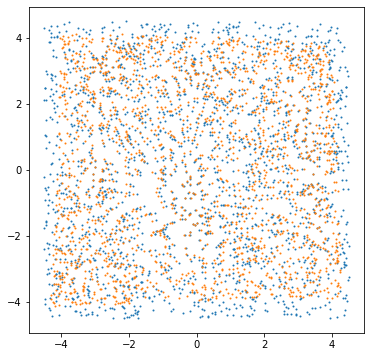

In [2]:
# read the vector field data
x0, x1 = read_vectorfield_data(base_filename="nonlinear_vectorfield_data")
fig, ax = plt.subplots(1,1,figsize=(6,6))
ax.scatter(x0[:,0], x0[:,1], s=1)
ax.scatter(x1[:,0], x1[:,1], s=1)
plt.show()

#### Part 1

Try to estimate a linear operator A for the nonlinear vector fields with unknown deltaT

In [3]:
A, _, _, _ = approx_lin_func(data=(x0,x1))

In [31]:
def compute_step(A, x0, delta_t):
    return x0 + delta_t * x0 @ A.T

(0.05052801805605718, 0.001)


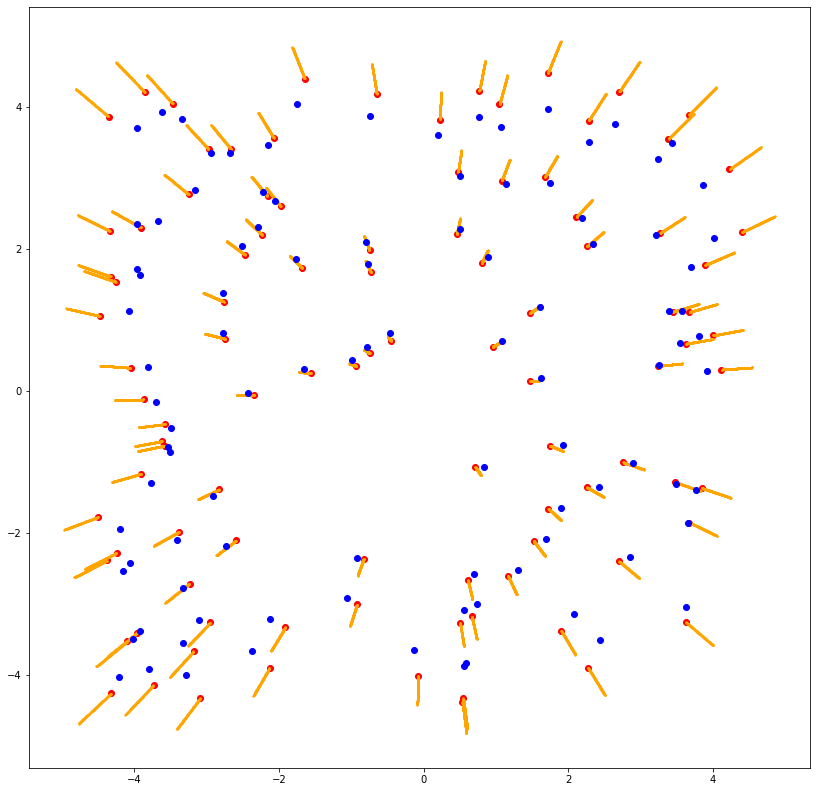

In [32]:
step = 0.001 
end_time = 0.1
slc = 100
new_x0 = x0
prev_lstsq = (math.inf, math.inf)
plt.rcParams["figure.figsize"] = (14,14)
plt.scatter(new_x0[:slc,0],new_x0[:slc,1], c='red')
for i in range(int(end_time / step)):
    curr_lstsq = np.mean([np.linalg.norm(a - b)**2 for (a,b) in zip(new_x0, x1)])
    if curr_lstsq < prev_lstsq[0]:
        prev_lstsq = (curr_lstsq, step*i + step)
    new_x0 = compute_step(A, new_x0, step)
    plt.scatter(new_x0[:slc,0],new_x0[:slc,1], c='orange', s=2)
plt.scatter(x1[:slc,0],x1[:slc,1], c='blue')
print(prev_lstsq)
plt.show()


#### Part 2

Try to approximate the vector field using radial basis functions (with the number of centers between
100 and 1000)

In [37]:
n_bases = 500
centers = np.random.choice(x0.ravel(), replace=False, size=n_bases)
C, _, _, _, centers, eps, phi = approx_nonlin_func(data=(x0,x1), n_bases=n_bases, eps=.5, centers=centers)

In [38]:
def compute_step(C, phi, x0, delta_t):
    return x0 + delta_t * phi @ C

(0.05052801805605718, 0.001)


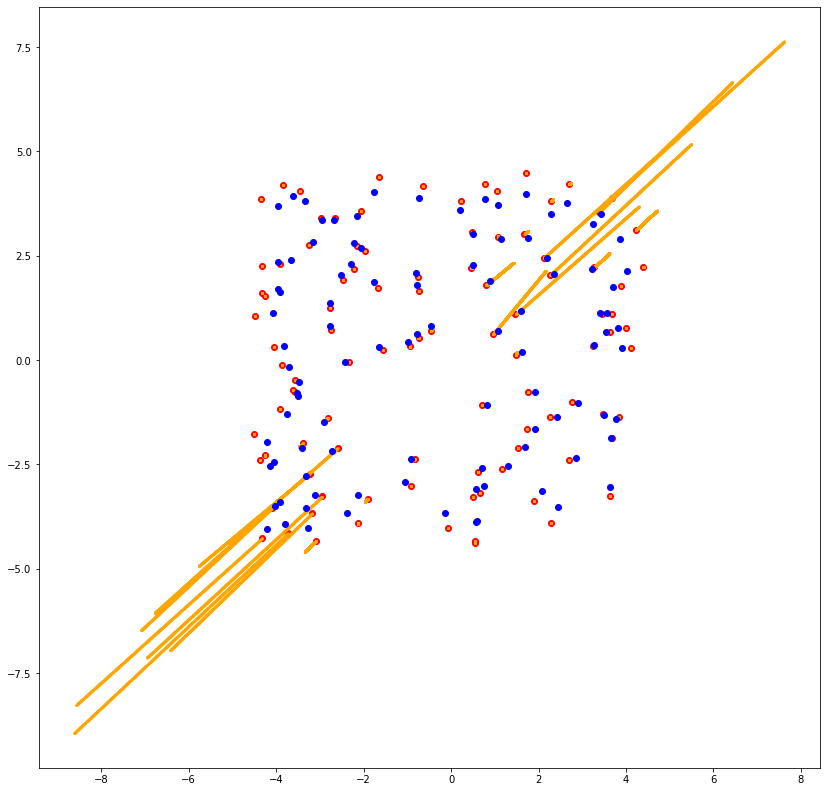

In [40]:
step = 0.001 
end_time = 1
new_x0 = x0
prev_lstsq = (math.inf, math.inf)
plt.rcParams["figure.figsize"] = (14,14)
plt.scatter(new_x0[:slc,0],new_x0[:slc,1], c='red')
for i in range(int(end_time / step)):
    curr_lstsq = np.mean([np.linalg.norm(a - b)**2 for (a,b) in zip(new_x0, x1)])
    if curr_lstsq < prev_lstsq[0]:
        prev_lstsq = (curr_lstsq, step*i + step)
    new_x0 = compute_step(C, phi, new_x0, step)
    plt.scatter(new_x0[:slc,0],new_x0[:slc,1], c='orange', s=2)
plt.scatter(x1[:slc,0],x1[:slc,1], c='blue')
print(prev_lstsq)
plt.show()